       Airline  AirlineID Source Destination    Route  Total_Stops  \
0       IndiGo          3    BLR         DEL  BLR-DEL            0   
1    Air India          1    CCU         BLR  CCU-BLR            2   
2  Jet Airways          4    DEL         COK  DEL-COK            2   
3       IndiGo          3    CCU         BLR  CCU-BLR            1   
4       IndiGo          3    BLR         DEL  BLR-DEL            1   

     DepartureDatetime      ArrivalDatetime  DurationMinutes  DayOfWeek  \
0  2019-03-24 22:20:00  2019-03-24 01:10:00              170          6   
1  2019-05-01 05:50:00  2019-05-01 13:15:00              445          2   
2  2019-06-09 09:25:00  2019-06-09 04:25:00             1140          6   
3  2019-05-12 18:05:00  2019-05-12 23:30:00              325          6   
4  2019-03-01 16:50:00  2019-03-01 21:35:00              285          4   

   IsWeekend  Price  
0          1   3897  
1          0   7662  
2          1  13882  
3          1   6218  
4          0  1330

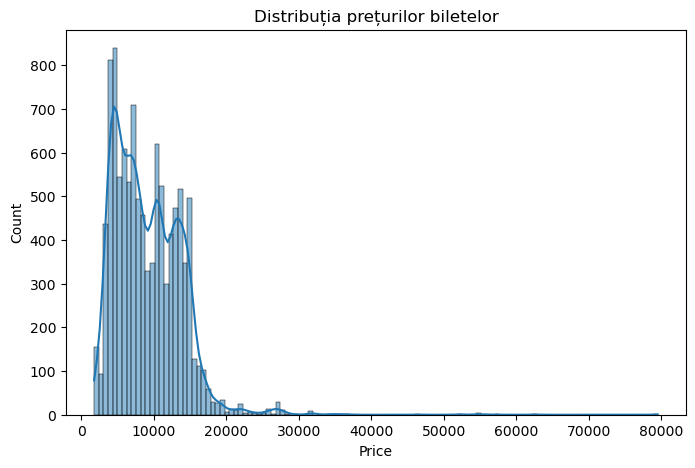

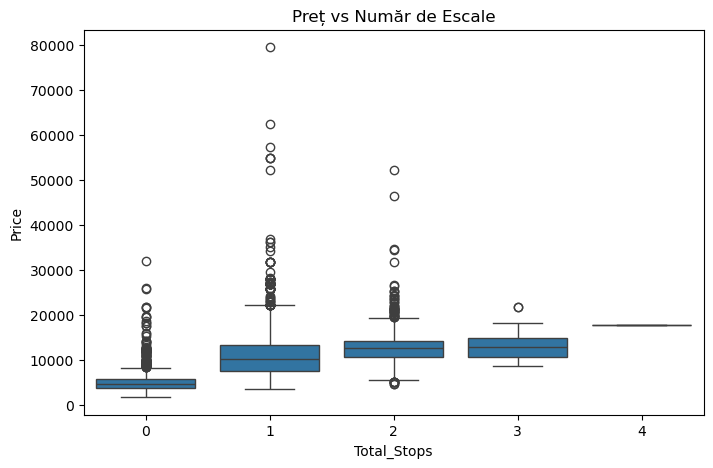

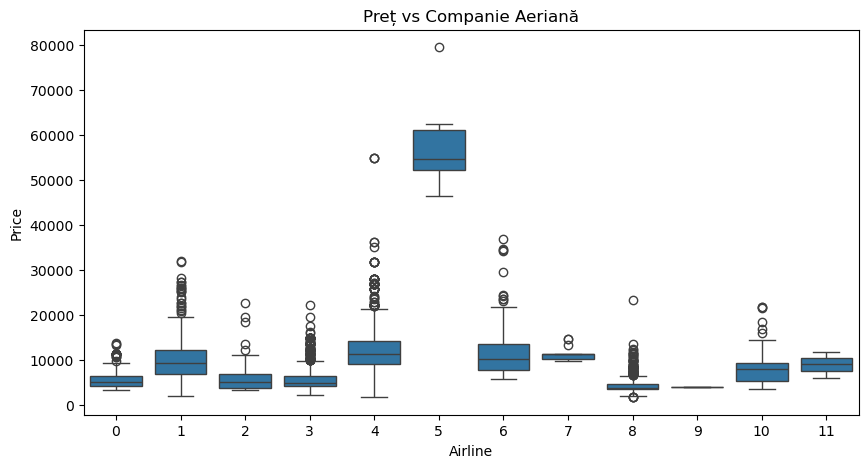

In [7]:
# Step 1: Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 2: Load the dataset
df = pd.read_csv('../data/flight_dataset_processed_iata.csv')

# Step 3: Quick exploration
print(df.head())
print(df.info())


# Check for missing values
print(df.isnull().sum())

#Eliminate incomplete rows
df = df.dropna()

# Step 4: Convert datetime columns
df['DepartureDatetime'] = pd.to_datetime(df['DepartureDatetime'])
df['ArrivalDatetime'] = pd.to_datetime(df['ArrivalDatetime'])

# Step 5: Extract datetime features
df['DepartureHour'] = df['DepartureDatetime'].dt.hour
df['DepartureDay'] = df['DepartureDatetime'].dt.day
df['DepartureMonth'] = df['DepartureDatetime'].dt.month
df['DepartureWeekday'] = df['DepartureDatetime'].dt.weekday

# Step 6: Encode categorical columns

# Create separate encoders
le_airline = LabelEncoder()
le_source = LabelEncoder()
le_destination = LabelEncoder()

# Fit and transform
df['Airline'] = le_airline.fit_transform(df['Airline'])
df['Source'] = le_source.fit_transform(df['Source'])
df['Destination'] = le_destination.fit_transform(df['Destination'])

# Step 7: Scale numerical features
scaler = MinMaxScaler()
df[['DurationMinutes', 'DepartureHour']] = scaler.fit_transform(df[['DurationMinutes', 'DepartureHour']])

# Step 8: Drop unnecessary columns
df = df.drop(['Route', 'ArrivalDatetime', 'DepartureDatetime'], axis=1)

# Distribuția prețurilor
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribuția prețurilor biletelor")
plt.show()

# Preț vs. număr de escale
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Preț vs Număr de Escale")
plt.show()

# Preț vs. Companie aeriană
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title("Preț vs Companie Aeriană")
plt.show()


In [ ]:
df.to_csv("../data/flight_dataset_cleaned.csv", index=False)
print("Cleaned dataset saved to '../data/flight_dataset_cleaned.csv'")

In [8]:
import os
import joblib
# Make sure the models folder exists
models_folder = '../models'
if not os.path.exists(models_folder):
    os.makedirs(models_folder)

# Save LabelEncoders
joblib.dump(le_airline, os.path.join(models_folder, 'le_airline.pkl'))
joblib.dump(le_source, os.path.join(models_folder, 'le_source.pkl'))
joblib.dump(le_destination, os.path.join(models_folder, 'le_destination.pkl'))

# Save the scaler
joblib.dump(scaler, os.path.join(models_folder, 'scaler.pkl'))

print("Encoders and scaler saved in ../models/")

Encoders and scaler saved in ../models/
